# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

# Target

Number of predicted wins (W)

# Importing Libraries

In [1091]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import skew
from sklearn.preprocessing import power_transform


from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [1092]:
bas=pd.read_csv("baseball.csv")

the data has been saved in dataFrame names bas

In [1093]:
bas.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The above chart shows first 5 rows of the datasheet

In [1094]:
bas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


the above comuln names are in initials we need to rename them all the data present numerical values

In [1095]:
print(bas.isna().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


No null values are present

In [ ]:


print(bas.eq('').sum())

no zero values pare present

In [1097]:
names = ['Number of predicted wins','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks','Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average','Complete Game','Shutouts','Saves','Errors']
bas = bas.rename(columns=dict(zip(bas.columns, names)))
bas.head()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The columns are been renamed for better understanding

<AxesSubplot:>

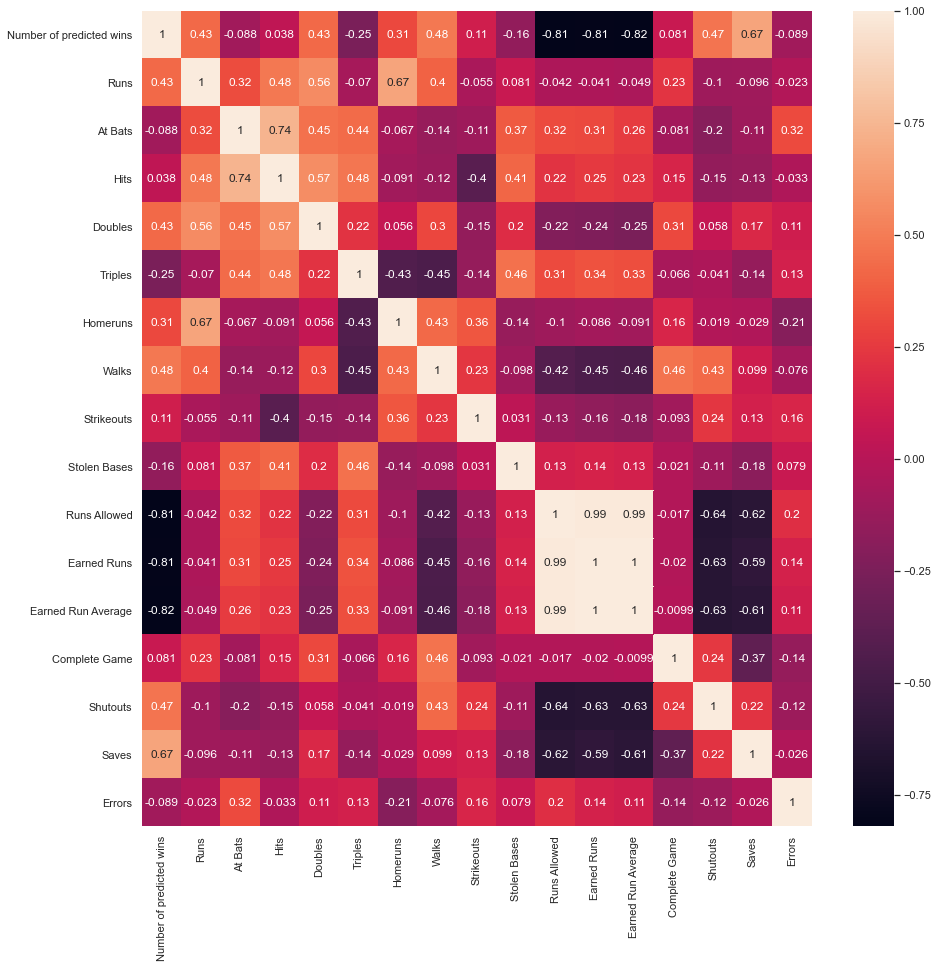

In [1098]:
plt.figure(figsize=(15,15))
sns.heatmap(bas.corr(),color = "blue", annot=True)

There are positive and negative correltions present between target variable i.e Number of predicted wins and other columns

PERFORMING BIVARIATE ANALYSIS

Text(0, 0.5, 'Runs')

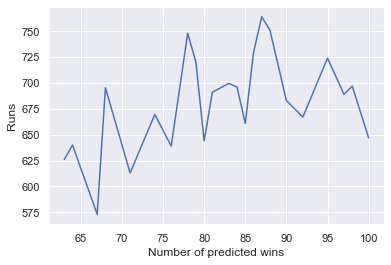

In [1179]:
bas.groupby('Number of predicted wins')['Runs'].mean().plot.line()
plt.ylabel("Runs")

The above visualization between Runs and Number of predicted wins

Text(0, 0.5, 'Doubles')

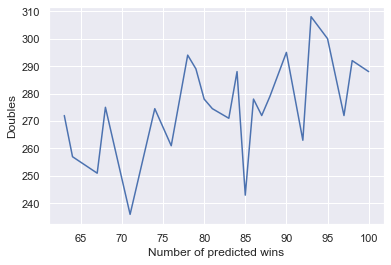

In [1099]:
bas.groupby('Number of predicted wins')['Doubles'].mean().plot.line()
plt.ylabel("Doubles")

The above visualization between Doubles and Number of predicted wins

Text(0, 0.5, 'Homeruns')

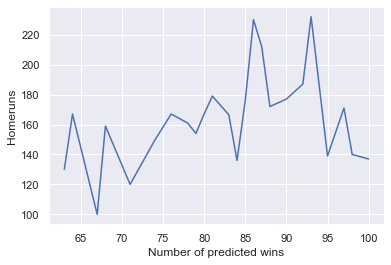

In [1100]:
bas.groupby('Number of predicted wins')['Homeruns'].mean().plot.line()
plt.ylabel("Homeruns")

The above visualization between Homeruns and Number of predicted wins

Text(0, 0.5, 'Strikeouts')

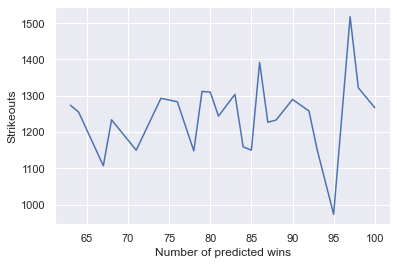

In [1101]:
bas.groupby('Number of predicted wins')['Strikeouts'].mean().plot.line()
plt.ylabel("Strikeouts")

In [ ]:
The above visualization between Strkeouts and Number of predicted wins

Text(0, 0.5, 'Shutouts')

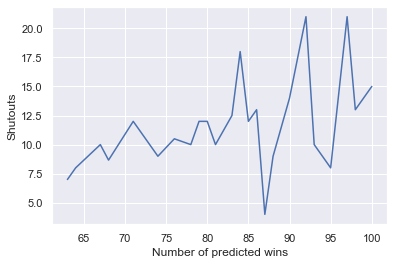

In [1102]:
bas.groupby('Number of predicted wins')['Shutouts'].mean().plot.line()
plt.ylabel("Shutouts")

In [ ]:
The above visualization between Shutouts and Number of predicted wins

Text(0, 0.5, 'Saves')

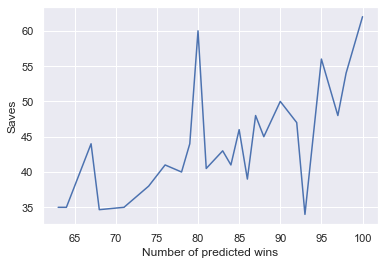

In [1103]:
bas.groupby('Number of predicted wins')['Saves'].mean().plot.line()
plt.ylabel("Saves")

In [ ]:
The above visualization between Saves and Number of predicted wins

Text(0, 0.5, 'Triples')

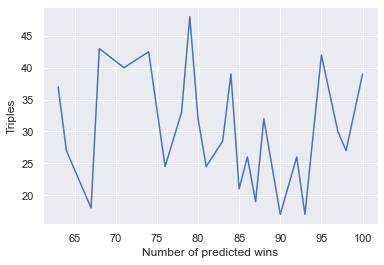

In [1104]:
bas.groupby('Number of predicted wins')['Triples'].mean().plot.line()
plt.ylabel("Triples")

In [ ]:
The above visualization between Triples and Number of predicted wins

Text(0, 0.5, 'Runs Allowed')

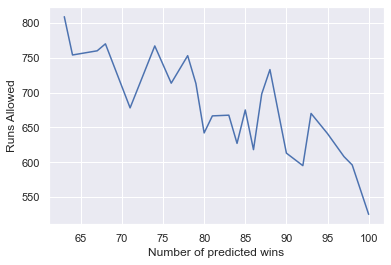

In [1105]:
bas.groupby('Number of predicted wins')['Runs Allowed'].mean().plot.line()
plt.ylabel("Runs Allowed")

In [ ]:
The above visualization between Runs Allowed and Number of predicted wins

Text(0, 0.5, 'Earned Runs')

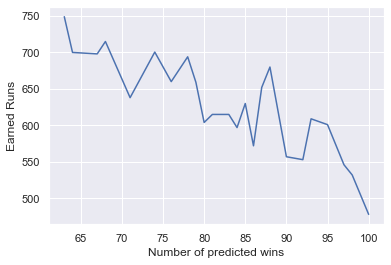

In [1106]:
bas.groupby('Number of predicted wins')['Earned Runs'].mean().plot.line()
plt.ylabel("Earned Runs")

The above visualization between Earned Runs and Number of predicted wins

Text(0, 0.5, 'Earned Run Average')

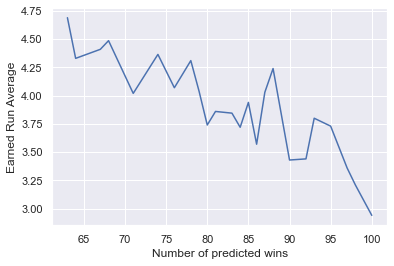

In [1107]:
bas.groupby('Number of predicted wins')['Earned Run Average'].mean().plot.line()
plt.ylabel("Earned Run Average")

In [ ]:
The above visualization between Earned Runs Average and Number of predicted wins

In [ ]:
sns.jointplot(x='TV',y='sales', data=data, kind='reg')

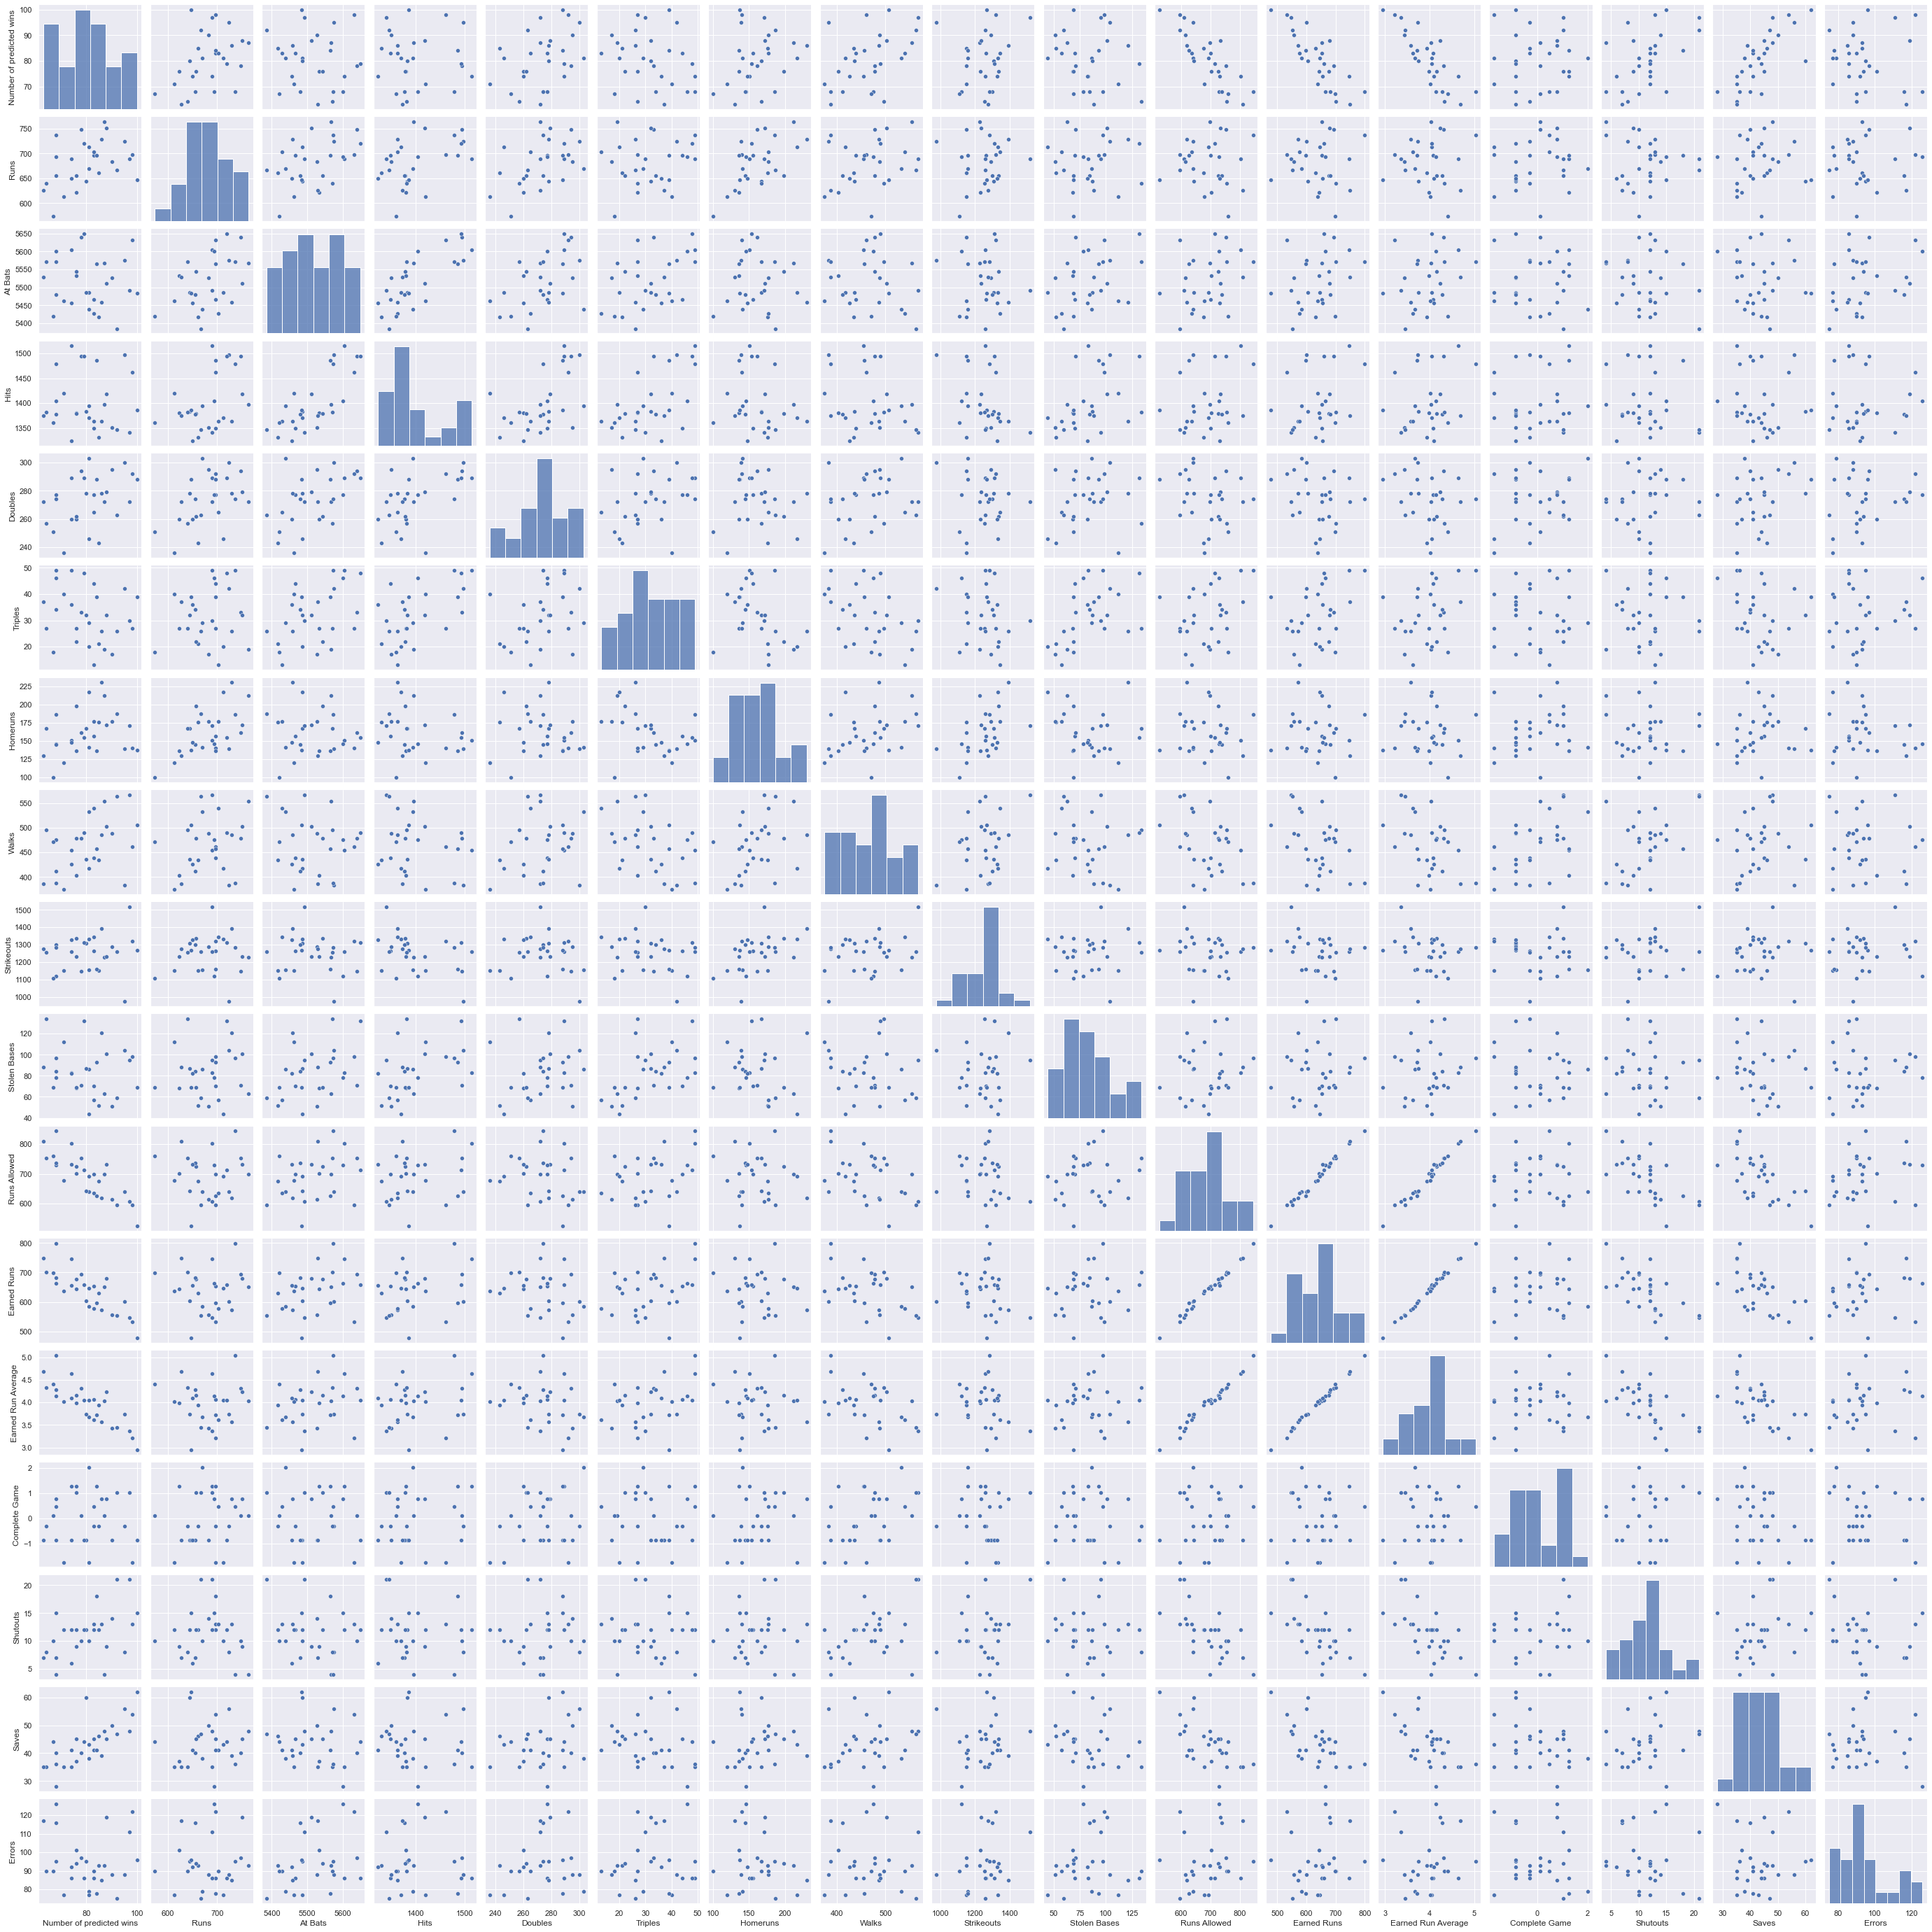

In [1180]:
sns.set()
cols = ['Number of predicted wins','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks','Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average','Complete Game','Shutouts','Saves','Errors']
sns.pairplot(bas[cols], size = 2.3)
plt.show()

outliersm

<AxesSubplot:>

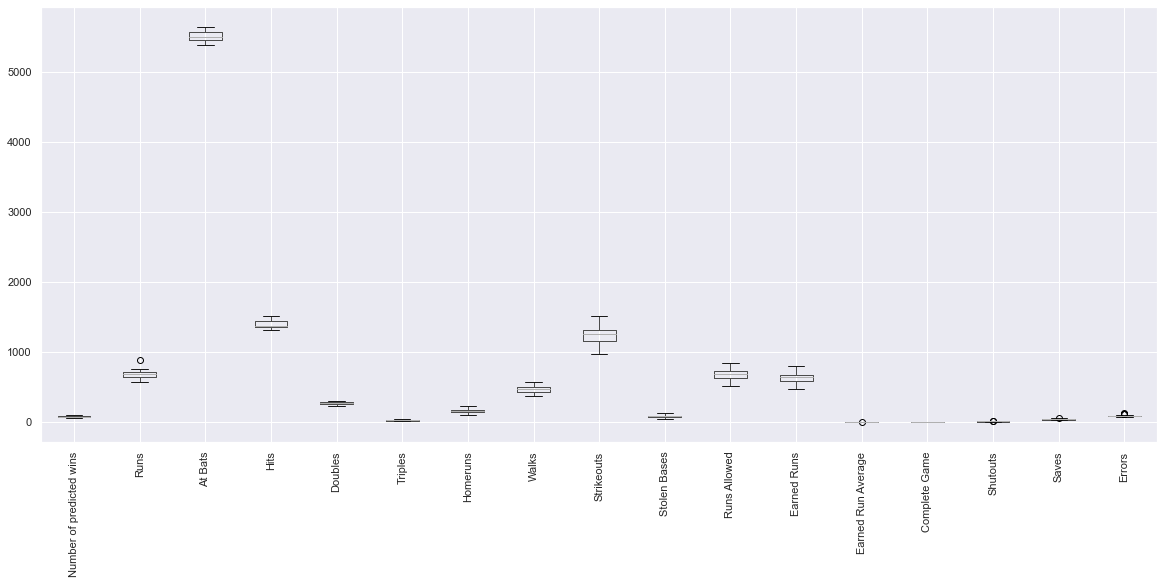

In [1108]:
bas.boxplot( rot = 90, figsize=(20,8))

There are outliers present in many columns

In [1109]:
from scipy.stats import zscore
z=np.abs(zscore(bas.iloc[:,1:16]))
bas_new=bas[(z<3).all(axis=1)]


array([[0.61907797, 0.84773126, 1.66368512, 1.42017307, 1.04119304,
        0.7872986 , 1.53490242, 2.69762957, 0.91388329, 0.66623393,
        0.50511008, 0.50695519, 0.5398062 , 0.81462859, 1.67160651],
       [0.13443166, 0.71109353, 0.97068076, 0.12740339, 1.23580856,
        0.24396668, 0.5365919 , 0.15487844, 0.60182558, 0.16597077,
        0.24892985, 0.25459752, 0.5398062 , 0.1728    , 0.24987932],
       [0.33290586, 1.1152333 , 0.15189137, 1.58879521, 0.22380785,
        0.7233772 , 1.13914361, 0.89398189, 0.11144918, 0.68033909,
        0.75162313, 0.64134684, 2.77264091, 0.32091429, 0.65485616],
       [1.14641931, 0.24152162, 0.40108814, 0.82812203, 0.41842337,
        0.8831807 , 1.16053598, 0.16860185, 0.69098493, 0.18007593,
        0.10392217, 0.05301004, 1.3004422 , 0.56777144, 0.78410408],
       [0.01327008, 1.28073815, 1.98408098, 0.80189192, 1.72234737,
        0.40377019, 0.25136033, 0.10586628, 0.02228984, 1.61880269,
        1.59750126, 1.53131824, 1.3004422 , 

The outliers has been removed and saved to other  temperory dataframe

In [1111]:
bas.shape

(30, 17)

shape before removing outliers

In [ ]:
bas_new.shape

shape after removing outliers

In [1113]:
bas=bas_new

saving the new dataset to original dataset

In [1114]:
bas.skew()

Number of predicted wins    0.119013
Runs                       -0.215364
At Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen Bases                0.494966
Runs Allowed                0.018155
Earned Runs                 0.018461
Earned Run Average          0.016693
Complete Game               0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

considering +-0.5 as threshold 

positive skewness Hits,Complete Game, Shutouts, Saves, Errors


<AxesSubplot:ylabel='Frequency'>

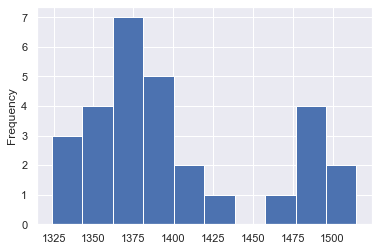

In [1115]:
bas['Hits'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

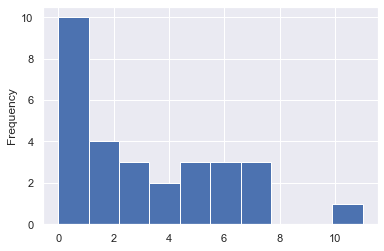

In [1116]:
bas['Complete Game'].plot.hist()

-0.04353574414581981


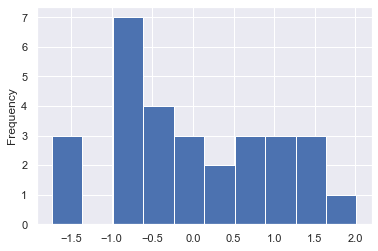

In [1117]:
bas['Complete Game']=power_transform(bas[['Complete Game']], method='yeo-johnson')
bas['Complete Game'].plot.hist()
print(skew(bas['Complete Game']))

<AxesSubplot:ylabel='Frequency'>

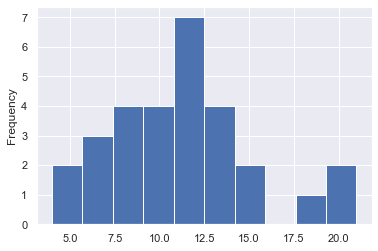

In [1118]:
bas['Shutouts'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

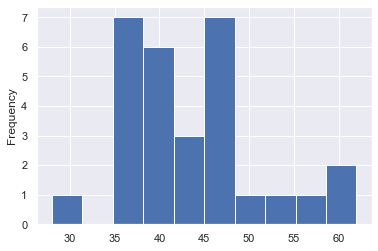

In [1119]:
bas['Saves'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

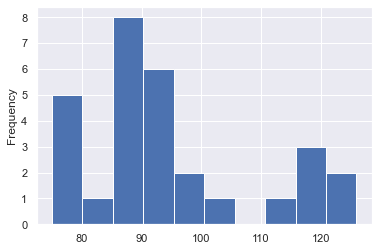

In [1120]:
bas['Errors'].plot.hist()

skewness is removed only for Complete game column as rest all columns are in normal curve 

In [1121]:
x = bas.drop(['Number of predicted wins'], axis=1)
y = bas['Number of predicted wins']

In [1122]:
x.shape

(29, 16)

In [1123]:
y.shape

(29,)

In [1124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

the data has been splitted for perorming ML


In [1128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_score



In [1163]:
models = []
models.append(('xgr', XGBRegressor()))
models.append(('gbr', GradientBoostingRegressor()))
models.append(('forest', RandomForestRegressor()))
models.append(('tree', DecisionTreeRegressor()))
models.append(('ridge', linear_model.Ridge()))
models.append(('lin', linear_model.LinearRegression()))


# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)




    c=metrics.mean_squared_error(y_test, y_pred)

    sc = cross_val_score(model, x_test, y_test, scoring='r2', cv=3)
    
  

    msg = "%s: %f %f %f " % (name,a,b,c)
    print(msg)
    print('\n')
    print(sc)
    print('\n')
    #print(y_pred)
    


xgr: 1.000000 0.141431 84.160958 


[-0.29767634  0.58564702  0.05831296]


gbr: 1.000000 0.080283 90.155012 


[0.29378521 0.21619932 0.03951053]


forest: 0.958093 0.365113 62.234633 


[0.34264856 0.21496344 0.23242924]


tree: 1.000000 0.025189 95.555556 


[ 0.15605749 -0.03776435 -1.79241071]


ridge: 0.949365 0.666998 32.642426 


[ 0.82964855  0.8597316  -0.41693263]


lin: 0.968579 0.598682 39.339033 


[0.69623492 0.85662266 0.21120781]




XGBRegressor' GradientBoostingRegressor RandomForestRegressor', DecisionTreeRegressor', LinearRegression',linear_model.Ridge

the above 6 regressor are used and for loop is been applied for best prformance among which ridge has least error score so thos model performs best

In [1164]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [1177]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
clf = GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(x_train, y_train).best_estimator_


print('train score',clf.score(x_train, y_train))


pred =clf.predict(x_test)


print('mse',mean_squared_error(y_test, pred))


print('r2 score',r2_score(y_test, pred))


train score 0.914610931527069
mse 28.475058434889846
r2 score 0.7095113686113252


performing hyperparameter tuning on random forest regressor and model  show imprvement so its better to continue with tuning 

# Saving Model

In [1171]:
import joblib
joblib.dump(clf,"base.obj")

['base.obj']